<a href="https://colab.research.google.com/github/hosseinrezaie0/CI-T.A-Dr.Helmi/blob/main/Neural%20Network/MLP/Iris/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the datast
data = pd.read_csv('/content/iris.data', header=None)

In [3]:
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# encoder = LabelEncoder()
# data['class'] = encoder.fit_transform(data['class'])

In [7]:
data['class'] = data['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

In [8]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

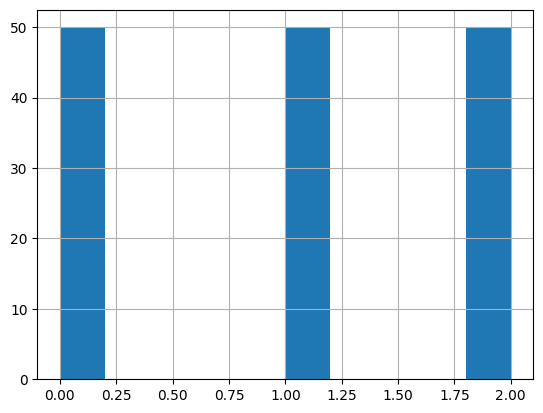

In [9]:
data['class'].hist()

In [10]:
data.shape

(150, 5)

In [11]:
X = data.drop('class', axis=1)
y = data['class']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
x_train.shape

(120, 4)

In [14]:
y_train.shape

(120,)

In [15]:
x_test.shape

(30, 4)

In [16]:
y_test.shape

(30,)

In [17]:
x_train.head(1)

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2


In [18]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [19]:
x_train[0]

array([-1.47393679,  1.22037928, -1.5639872 , -1.30948358])

In [20]:
MLP = Sequential(
    [
        Dense(10, activation='relu', input_shape=(X.shape[1],)),
        Dense(10, activation='relu'),
        Dense(3, activation='softmax')
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
MLP.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = MLP.fit(x_train, y_train, epochs=30, batch_size=8, validation_split=0.2)

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - accuracy: 0.4899 - loss: 1.0548 - val_accuracy: 0.3333 - val_loss: 1.0681
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4424 - loss: 1.0156 - val_accuracy: 0.3750 - val_loss: 1.0140
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5533 - loss: 0.9639 - val_accuracy: 0.5417 - val_loss: 0.9650
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7049 - loss: 0.8802 - val_accuracy: 0.5833 - val_loss: 0.9226
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6064 - loss: 0.8577 - val_accuracy: 0.5833 - val_loss: 0.8770
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5326 - loss: 0.8666 - val_accuracy: 0.7500 - val_loss: 0.8399
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6720 - loss: 0.7949 - val_accuracy: 0.8333 - val_loss: 0.7991
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6752 - loss: 0.7592 - val_accuracy: 0.7917 - val_lo

In [23]:
loss_train = history.history['loss']
acc_train = history.history['accuracy']
loss_val = history.history['val_loss']
acc_val = history.history['val_accuracy']

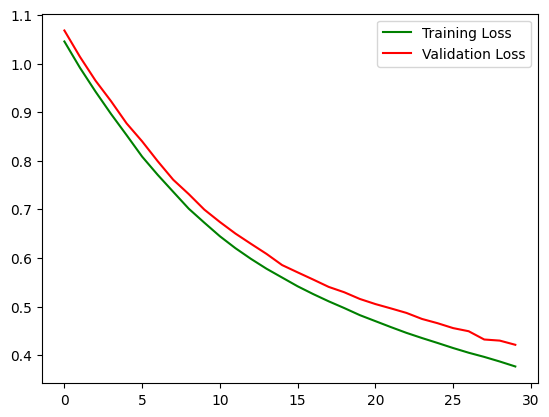

In [24]:
plt.plot(loss_train, label='Training Loss', color='g')
plt.plot(loss_val, label='Validation Loss', color='r')
plt.legend()


In [26]:
loss, acc = MLP.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")

Test Loss: 0.3144
Test Accuracy: 0.9667
